# install necessarly libraries

In [ ]:
!pip install --upgrade setuptools==65.5.0
!pip install git+https://github.com/carlosluis/stable-baselines3@fix_tests
!pip install --upgrade gym==0.21.0
# !pip install box2d-py
# !pip install gym[box2d]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.6.1
    Uninstalling setuptools-67.6.1:
      Successfully uninstalled setuptools-67.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
cvxpy 1.3.1 requires setuptools>65.5.1, but you have setuptools 65.5.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/carlosluis/stable-baselines3 (to revision fix_tests) to /tmp/pip-req-build-zw3jbvds
  Running command git clone --filter=blob:none --quiet https://github.com/carlosluis/stable-baselines3 /tmp/pi

In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install --upgrade "importlib_metadata<5.0"
!pip install pyglet==1.4.11
!apt install swig cmake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.7 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.16.3-1ubuntu1.20.04.1).
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 24 not upgraded.
Need to get 1,086 kB of archives.
After this operation, 5,413 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 swig4.0 amd64 4.0.1-5build1 [1,081 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 swig all 4.0.1-5build1 [5,528 B]
Fetched 1,086 kB in 0s (8,026 kB/s)
Selecting previously unselected p

# import libraries

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pyvirtualdisplay import Display

In [ ]:
gym.__version__

'0.21.0'

# display output as video

In [ ]:
# pyvirtusldisplay is only needed if running on a Colab or Kaggle notebook
display = Display(visible=0, size=(1400, 900))
display.start()

def animate(imgs, video_name=None, _return=True):
    # using cv2 to generate videos
    import cv2
    import os
    import string
    import random
    video_name = video_name if video_name is not None else ''.join(random.choice(string.ascii_letters) for i in range(18))+'.webm'
    height, width, layers = imgs[0].shape
    video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'VP80'), 20, (width,height))
    for img in imgs:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        video.write(img)
    video.release()
    if _return:
        from IPython.display import Video
        return Video(video_name)

In [ ]:
GAMMA = 0.9

# Show Policy and Value function with Matplotlib table

In [ ]:
def show_values_on_table(values , show_policy, nrow = 4, ncol = 4):
    table_data = np.zeros((nrow, ncol))
    # set the value function values for each state
    table_data = np.reshape(value_function, (nrow, ncol))
    values = np.reshape(values, (nrow, ncol))
    # create a color map for the table cells
    cmap = plt.cm.Pastel1
    # create a table showing the policy
    fig, ax = plt.subplots()
    ax.imshow(values, cmap=cmap)
    policy_map = dict({0:'←', 1:'↓', 2:'→', 3:'↑'})
    # add table cells and labels
    for i in range(values.shape[0]):
        for j in range(values.shape[1]):
            if show_policy:
                ax.text(j, i, policy_map[values[i][j]], va='center', ha='center')
            else:
                ax.text(j, i, "{:.2f}".format(values[i][j]), va='center', ha='center')
    ax.set_xticks(np.arange(values.shape[1]))
    ax.set_yticks(np.arange(values.shape[0]))
    ax.set_xticklabels(['1', '2', '3', '4'])
    ax.set_yticklabels(['1', '2', '3', '4'])
    ax.grid(False)
    plt.show()

# Compute Return for Specific Policy

In [ ]:
def compute_return(env, policy, gamma=0.5, n_episodes=100):
    total_return = 0
    for episode in range(n_episodes):
        state = env.reset()
        episode_return = 0
        done = False
        while not done:
            action = policy[state]
            next_state, reward, done, _ = env.step(action)
            episode_return += reward
            state = next_state
        total_return += gamma**episode * episode_return
    return total_return

In [ ]:
def plot_return(return_values):
  plt.plot(range(len(return_values)), return_values)
  plt.xlabel('Number of iterations')
  plt.ylabel('Return')
  plt.title('Return of policy in each iteration')
  plt.show()

# implement policy iteration

In [ ]:
# policy evaluation
def evaluate_policy(P, nS, nA, value_function, policy, gamma=0.9, tol=1e-4):
  while True:
    delta = 0
    for s in range(nS):
      value_s = value_function[s]
      policy_s = policy[s]
      q = 0
      value_function[s] = 0
      for prob, s_prime, reward, done in P[s][policy_s]:
        v_s_prime = value_function[s_prime]
        value_function[s] += prob * (reward + gamma * v_s_prime)
      delta = max(delta, abs(value_s - value_function[s]))
    if delta < tol:
      break
  return value_function

In [ ]:
# policy improvement
def improve_policy(P, nS, nA, value_function, policy, gamma=0.9, tol=1e-4):
  policy_stable = True
  for s in range(nS):
    old_action = policy[s]
    q = np.zeros(nA)
    for a in range(nA):
      for prob, s_prime, reward, done in P[s][a]:
        v_s_prime = value_function[s_prime]
        q[a] += prob * (reward + gamma * v_s_prime)
    policy[s] = np.argmax(q)
    if old_action != policy[s]:
      policy_stable = False
  return policy, policy_stable

In [ ]:
def policy_iteration(P, nS, nA, gamma=0.9, tol=1e-4):
    '''
    parameters:
        P: transition probability matrix
        nS: number of states
        nA: number of actions
        gamma: discount factor
        tol: tolerance for convergence
    returns:
        value_function: value function for each state
        policy: policy for each state
    '''
    # initialize value function and policy
    value_function = np.zeros(nS)
    policy = np.zeros(nS, dtype=int)
    return_of_policy = []
    # Implement policy iteration here #
    while True:
      value_function = evaluate_policy(P, nS, nA, value_function, policy, gamma, tol)
      policy, policy_stable = improve_policy(P, nS, nA, value_function, policy, gamma, tol)
      return_of_policy.append(compute_return(env, policy, gamma=gamma))
      if policy_stable:
          plot_return(return_of_policy)
          return value_function, policy

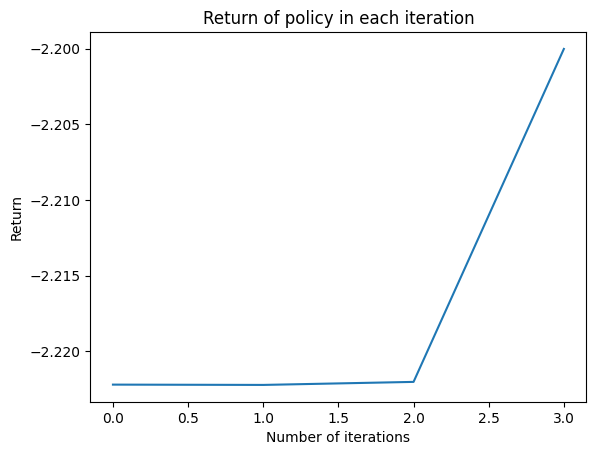

In [ ]:
from gym.envs.toy_text import frozen_lake
class CustomFrozenLakeEnv(frozen_lake.FrozenLakeEnv):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def step(self, action):
        state, reward, done, info = super().step(action)
        if done == True and state != 15:
          reward = -2 # Set the reward for Holes
        else:
          reward = 0  # Set the reward for each step
        return state, reward, done, info


# Register the custom environment
gym.envs.register(
    id='CustomFrozenLake-v1',
    entry_point='__main__:CustomFrozenLakeEnv',
    kwargs={'map_name': '4x4', 'is_slippery': True}
)

# Create an instance of the custom environment
env = gym.make('CustomFrozenLake-v1')
value_function, policy = policy_iteration(env.P, env.nS, env.nA, gamma=0.1, tol=1e-4)

In [ ]:
# env = gym.make("FrozenLake-v1", is_slippery=True)
# # reset environment to start state
# env.reset()
# # run value iteration algorithm
# value_function, policy = policy_iteration(env.P, env.nS, env.nA, gamma=0.1, tol=1e-4)

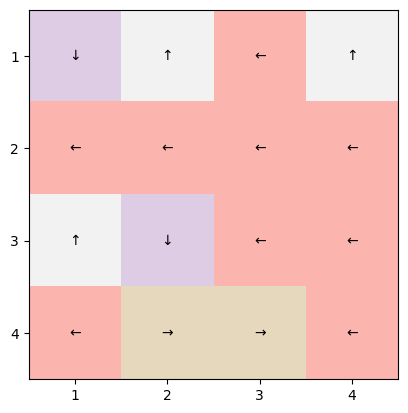

In [ ]:
show_values_on_table(policy, show_policy = True)

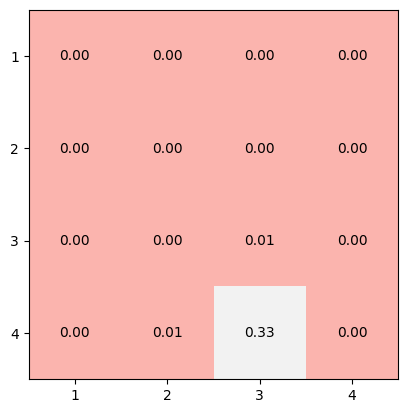

In [ ]:
show_values_on_table(value_function, show_policy = False)

# implement value iteration

In [ ]:
# policy evaluation
def evaluate_policy(P, nS, nA, value_function, policy, gamma=0.9, tol=1e-4):
  while True:
    delta = 0
    for s in range(nS):
      value_s = value_function[s]
      q = np.zeros(nA)
      value_function[s] = 0
      for a in range(nA):
        for prob, s_prime, reward, done in P[s][a]:
          v_s_prime = value_function[s_prime]
          q[a] += prob * (reward + gamma * v_s_prime)
      value_function[s] = np.max(q)
      delta = max(delta, abs(value_s - value_function[s]))
    if delta < tol:
      break
  return value_function

In [ ]:
def value_iteration(P, nS, nA, gamma=0.9, tol=1e-4):
    '''
    parameters:
        P: transition probability matrix
        nS: number of states
        nA: number of actions
        gamma: discount factor
        tol: tolerance for convergence
    returns:
        value_function: value function for each state
        policy: policy for each state
    '''
    # initialize value function and policy
    value_function = np.zeros(nS)
    policy = np.zeros(nS, dtype=int)

    # Implement value iteration here #
    value_function = evaluate_policy(P, nS, nA, value_function, policy, gamma, tol)
    policy, _ = improve_policy(P, nS, nA, value_function, policy, gamma, tol)
    return value_function, policy

In [ ]:
# create FrozenLake environment note that we are using a deterministic environment change is_slippery to True to use a stochastic environment
env = gym.make("FrozenLake-v1", is_slippery=True)
# reset environment to start state
env.reset()
# run value iteration algorithm
value_function, policy = value_iteration(env.P, env.nS, env.nA, gamma=GAMMA, tol=1e-4)


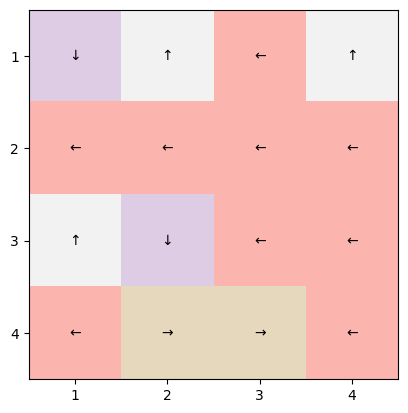

In [ ]:
show_values_on_table(policy, show_policy = True)

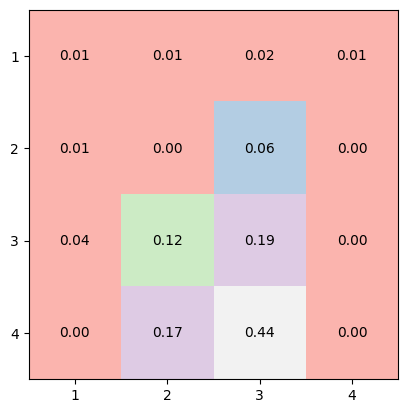

In [ ]:
show_values_on_table(value_function, show_policy = False)

In [ ]:
env = gym.make("FrozenLake-v1", is_slippery=False)
env.reset()
for s in range(env.observation_space.n):
    for a in range(env.action_space.n):
        transitions = env.P[s][a]
        for p, s_next, r, done in transitions:
            print(f"State {s}, action {a}, transition to state {s_next} with reward {r}")

State 0, action 0, transition to state 0 with reward 0.0
State 0, action 1, transition to state 4 with reward 0.0
State 0, action 2, transition to state 1 with reward 0.0
State 0, action 3, transition to state 0 with reward 0.0
State 1, action 0, transition to state 0 with reward 0.0
State 1, action 1, transition to state 5 with reward 0.0
State 1, action 2, transition to state 2 with reward 0.0
State 1, action 3, transition to state 1 with reward 0.0
State 2, action 0, transition to state 1 with reward 0.0
State 2, action 1, transition to state 6 with reward 0.0
State 2, action 2, transition to state 3 with reward 0.0
State 2, action 3, transition to state 2 with reward 0.0
State 3, action 0, transition to state 2 with reward 0.0
State 3, action 1, transition to state 7 with reward 0.0
State 3, action 2, transition to state 3 with reward 0.0
State 3, action 3, transition to state 3 with reward 0.0
State 4, action 0, transition to state 4 with reward 0.0
State 4, action 1, transition t